In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Datos

In [2]:
#Subir un directorio
os.chdir("..")

In [3]:
eco = pd.read_csv('resultados/ecoturismo_results.csv')
res = pd.read_csv('resultados/restaurantes_results.csv')
master = pd.read_csv('modelo/base_final_lugares.csv')

# Modificaciones

In [4]:
df = master.copy()
#Pegar predicciones de restaurantes y ecoturismo
df_temp = pd.concat([eco, res])
df = pd.merge(master, df_temp, how='left', on='place_id')

In [5]:
df['tipo_lugar'].unique()

array(['Museo', 'Comida mexicana', 'Templo', 'Teatro', 'Ecoturismo',
       'Pirámides'], dtype=object)

In [6]:
df.loc[df['tipo_lugar']=='Templo', 'pred'] = 1
df.loc[df['tipo_lugar']=='Museo', 'pred'] = 2
df.loc[df['tipo_lugar']=='Teatro', 'pred'] = 3
df.loc[df['tipo_lugar']=='Pirámides', 'pred'] = 4

# Variables

In [11]:
# índice de satisfacción: Ratings + variable de satisfacción
df['rating_scaled'] = (df['rating'] - df['rating'].min()) / (df['rating'].max()-df['rating'].min())
df['satisfaccion_scaled'] = (df['satisfaccion_norm'] - df['satisfaccion_norm'].min()) / (df['satisfaccion_norm'].max()-df['satisfaccion_norm'].min())

(array([ 3., 13., 17., 39., 80., 62., 35., 17.,  0.,  4.]),
 array([0.05555556, 0.13306375, 0.21057194, 0.28808014, 0.36558833,
        0.44309653, 0.52060472, 0.59811291, 0.67562111, 0.7531293 ,
        0.8306375 ]),
 <BarContainer object of 10 artists>)

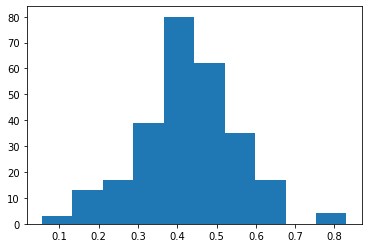

In [17]:
plt.hist(df['satisfaction_index'])

In [16]:
df['satisfaction_index'] = (df['satisfaccion_scaled'] + df['rating_scaled'] )/2

# Tabla final

In [18]:
df.to_csv('resultados/base_final.csv')